In [2]:
from torchvision import transforms
import os
from PIL import Image
from matplotlib import pyplot as plt
import torch

In [2]:
# Get MEAN, STD of DATASET
DATAPATH = '/home/daoduyhung/hicehehe/iccv2023/data-test/train/'
files = os.listdir(DATAPATH)

composed = transforms.Compose([
    transforms.ToTensor(),
])

n_files = len(files)
avg_mean = 0
avg_std = 0
for file in files:
    img = Image.open(os.path.join(DATAPATH,file))
    img = composed(img)
    std, mean = torch.std_mean(img, dim=(1,2))
    avg_std += std/n_files
    avg_mean += mean/n_files

print(avg_mean, avg_std)

FileNotFoundError: [Errno 2] No such file or directory: '/home/daoduyhung/hicehehe/iccv2023/data-test/train/class1'

In [2]:
# observe mae model
import models_mae

class Args():
    def __init__(self):
        self.model = 'mae_vit_base_patch16'
        self.norm_pix_loss = True

args = Args()

model = models_mae.__dict__[args.model](norm_pix_loss=args.norm_pix_loss)

print(model)

input = torch.rand((16,3,224,224))
output = model(input)


MaskedAutoencoderViT(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (blocks): ModuleList(
    (0-11): 12 x Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
  (decoder_embed): Linear(in_features=768, out_features=512, bias=

In [16]:
# observe vit model for finetune
import models_vit

class Args():
    def __init__(self):
        self.model = 'vit_base_patch16'
        self.nb_classes = 1000
        self.drop_path = 0.1
        self.global_pool = True

args = Args()

model = models_vit.__dict__[args.model](
    num_classes=args.nb_classes,
    drop_path_rate=args.drop_path,
    global_pool=args.global_pool,
)

print(model)

input = torch.rand((16,3,224,224))
output = model(input)
output.shape

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
    (1-11): 11 x Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (a

torch.Size([16, 1000])

In [18]:
# observe vit model for linprob
import models_vit

class Args():
    def __init__(self):
        self.model = 'vit_base_patch16'
        self.nb_classes = 1000
        self.global_pool = False

args = Args()

model = models_vit.__dict__[args.model](
    num_classes=args.nb_classes,
    global_pool=args.global_pool,
)

print(model)

input = torch.rand((16,3,224,224))
output = model(input)
# output.shape

VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (blocks): ModuleList(
    (0-11): 12 x Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
    )
  )
  (norm): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
  (head): Linear(in_featu

In [1]:
from f1score import F1Score

In [2]:
from torchvision.models import resnet18
import torch.nn as nn
from torchvision.datasets import ImageFolder, CIFAR10
from torch.utils.data import DataLoader
import torch
from torchvision import transforms
import torchvision
from f1score import F1Score

# model = resnet18(torchvision.models.ResNet18_Weights)

seed = 23
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
num_classes = 3
train_path = "/home/daoduyhung/hicehehe/iccv2023/ICCV_classification_data/train"
val_path = "/home/daoduyhung/hicehehe/iccv2023/ICCV_classification_data/val"
device = 'cuda'
batch_size=64


model = resnet18(weights=torchvision.models.ResNet18_Weights.IMAGENET1K_V1)
model.fc = nn.Linear(in_features=512, out_features=num_classes)
for _, param in model.named_parameters():
    param.requires_grad = False
for _, param in model.fc.named_parameters():
    param.requires_grad = True

model.to('cuda')

criterion = nn.CrossEntropyLoss()
metric = F1Score(average='macro')
trans = transforms.Compose([
    transforms.Resize((96, 96), antialias=True),
    transforms.ToTensor(),
])

train_data = ImageFolder(train_path, transform=trans)
val_data = ImageFolder(val_path, transform=trans)
# train_data = CIFAR10(root='./data', train=True, transform=trans, download=True)
# val_data = CIFAR10(root='./data', train=False, transform=trans, download=True)

train_loader = DataLoader(train_data, batch_size=batch_size, num_workers=4, shuffle=True, drop_last=True)
val_loader = DataLoader(val_data, batch_size=batch_size, num_workers=4)

optim = torch.optim.Adam(model.parameters(), lr=5e-6)

def accuracy(output, target):
    pred = output.argmax(dim=1)
    return (pred == target).float().sum()

for i in range(50):
    model.train()

    for sample, target in train_loader:
        optim.zero_grad()
        sample = sample.to(device)
        target = target.to(device)
        out = model(sample)

        loss = criterion(out, target)

        loss.backward()
        optim.step()


    with torch.no_grad():
        model.eval()
        
        acc_mat = torch.zeros((num_classes + 1, 3))

        for sample, target in train_loader:
            sample = sample.to(device)
            target = target.to(device)

            # compute output
            output = model(sample)
            f1_score_train, acc_mat = metric(acc_mat, output, target)


        acc_mat = torch.zeros((num_classes + 1, 3))

        for sample, target in val_loader:
            sample = sample.to(device)
            target = target.to(device)

            # compute output
            output = model(sample)
            f1_score_val, acc_mat = metric(acc_mat, output, target)
        
        for id in range(num_classes):
            accuracy_class = metric.calc_accuracy_count_for_label(acc_mat, id)
            print(f"class {id}: {accuracy_class}")
    
    print(f'Epoch {i}: loss {loss}, train_f1_score: {f1_score_train}, val_f1_score: {f1_score_val} ')


class 0: (tensor(5.), tensor(46.))
class 1: (tensor(15.), tensor(25.))
class 2: (tensor(71.), tensor(379.))
Epoch 0: loss 1.4065866470336914, train_f1_score: 0.14759688079357147, val_f1_score: 0.13122718036174774 
class 0: (tensor(5.), tensor(46.))
class 1: (tensor(14.), tensor(25.))
class 2: (tensor(123.), tensor(379.))
Epoch 1: loss 1.2779639959335327, train_f1_score: 0.2147025614976883, val_f1_score: 0.15830115973949432 
class 0: (tensor(5.), tensor(46.))
class 1: (tensor(14.), tensor(25.))
class 2: (tensor(141.), tensor(379.))
Epoch 2: loss 1.336181402206421, train_f1_score: 0.23010730743408203, val_f1_score: 0.17472118139266968 
class 0: (tensor(6.), tensor(46.))
class 1: (tensor(14.), tensor(25.))
class 2: (tensor(152.), tensor(379.))
Epoch 3: loss 1.1996145248413086, train_f1_score: 0.24516995251178741, val_f1_score: 0.18457801640033722 
class 0: (tensor(6.), tensor(46.))
class 1: (tensor(13.), tensor(25.))
class 2: (tensor(171.), tensor(379.))
Epoch 4: loss 1.0925889015197754, 

tensor([[-0.8419, -2.3742,  0.9024]], device='cuda:0',
       grad_fn=<AddmmBackward0>) tensor([0], device='cuda:0')


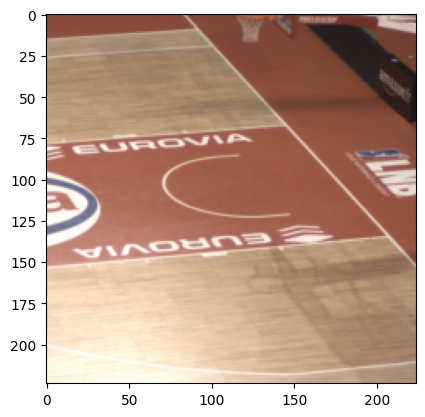

In [76]:
model.eval()
pos = 0

topil = transforms.ToPILImage()

for batch in val_loader:
    images = batch[0]
    target = batch[-1]
    images = images.to(device)
    target = target.to(device)

    # compute output
    output = model(images)
    pred = output.argmax(dim=1)
    if pred != target:
        print(output, target)
        plt.imshow(topil(images.squeeze(0)))
        break



In [30]:
nclass = 4
batch = 8

acc_mat = torch.zeros((nclass + 1, 3))

f1_score_fn = F1Score('micro')
acc_mat

np_target = torch.tensor([])
np_predict = torch.tensor([])

for i in range(3):
    target = torch.randint(0, nclass, (batch,))
    predict_1D = target.clone()
    wrong_index = torch.randperm(batch)[:torch.randint(2,4, (1,))]
    predict_1D[wrong_index] = torch.where(predict_1D[wrong_index] > 0, predict_1D[wrong_index] - 1, 1)
    predict_2D = torch.zeros((batch,nclass))
    predict_2D[torch.arange(0, batch), predict_1D] = 1
    f1_score, acc_mat = f1_score_fn(acc_mat, predict_2D, target)
    np_target = torch.cat((np_target, target))
    np_predict = torch.cat((np_predict, predict_1D))
    print(f'target {target}, \npredict {predict_1D}')
    print(f1_score)
    print()



target tensor([2, 1, 3, 2, 3, 1, 0, 0]), 
predict tensor([2, 1, 3, 2, 2, 1, 1, 1])
tensor(0.6250)

target tensor([1, 3, 0, 1, 1, 3, 1, 1]), 
predict tensor([0, 3, 0, 1, 0, 3, 1, 1])
tensor(0.6875)

target tensor([1, 2, 3, 0, 1, 2, 1, 3]), 
predict tensor([0, 1, 3, 0, 1, 2, 1, 2])
tensor(0.6667)



In [31]:
import numpy as np
from sklearn.metrics import f1_score
y_true = np_target.numpy()
y_pred = np_predict.numpy()
print(y_true)
print(y_pred)
f1_score(y_true, y_pred, average='micro')

# f1_score(y_true, y_pred, average='micro')
# f1_score(y_true, y_pred, average='weighted')


[2. 1. 3. 2. 3. 1. 0. 0. 1. 3. 0. 1. 1. 3. 1. 1. 1. 2. 3. 0. 1. 2. 1. 3.]
[2. 1. 3. 2. 2. 1. 1. 1. 0. 3. 0. 1. 0. 3. 1. 1. 0. 1. 3. 0. 1. 2. 1. 2.]


0.6666666666666666